# This is an example of an Metadata graph
## We assume all metadata can be mapped to effectively a python dictionary, that is a key:value pair
1. Python Dictionary
2. Two python lists 
3. HTML metadata pairs
4. json
5. xml
6. pandas.DataFrame 
7. A header string 
8. pickled dictionary


In [1]:
from pyMeasure.Code.DataHandlers.GraphModels import Graph
from pyMeasure import *
import json
import re
import pickle
import pandas
from ipywidgets import *
from scipy.io import savemat,loadmat


Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
test_dictionary={"1":"one","2":"two"}

In [33]:
def replace_None(string):
    """Replaces the string 'None' with the python value None"""
    if string:
        if re.match("None",string):
            return None
        else:
            return string
    else:
        return string
    
def dict_to_json_string(python_dictionary):
    """Uses json module to create a json string from a python dictionary"""
    return json.dumps(python_dictionary)

def json_string_to_dict(json_string):
    """Uses json module to return a python dictionary"""
    out_dictionary=json.loads(json_string)
    for key,value in out_dictionary.iteritems():
        out_dictionary[key]=replace_None(value)
    return out_dictionary

def json_string_to_json_file(json_string,file_name="test.json"):
    out_file=open(file_name,'w')
    out_file.write(json_string)
    out_file.close()
    return file_name

def json_file_to_json_string(json_file_name):
    in_file=open(json_file_name,'r')
    json_string=in_file.read()
    in_file.close()
    return json_string

def dictionary_to_xml(dictionary=None,char_between='\n'):
    string_output=''
    for key,value in dictionary.iteritems():
        xml_open="<"+str(key)+">"
        xml_close="</"+str(key)+">"
        string_output=string_output+xml_open+str(value)+xml_close+char_between
    return string_output

def xml_to_dictionary(xml_string):
    """XML string must be in the format <key>value</key>\n<key2>.. to work"""
    pattern='<(?P<XML_tag>.+)>(?P<XML_text>.+)</.+>'
    lines=xml_string.splitlines()
    out_dictionary={}
    for line in lines:
        match=re.search(pattern,line)
        if match:
            key=match.groupdict()["XML_tag"].rstrip().lstrip().replace("\'","")
            value=match.groupdict()["XML_text"].rstrip().lstrip().replace("\'","")
            out_dictionary[key]=value
    return out_dictionary


def dictionary_to_HTML_meta(python_dictionary):
    """Converts a python dictionary to meta tags for html"""
    out_string=""
    for key,value in python_dictionary.iteritems():
        out_string=out_string+"<meta name="+'"{0}"'.format(key)+" content="+'"{0}"'.format(value)+" />\n"
    return out_string

def HTML_meta_to_dictionary(HTML_meta_tags_string):
    """Converts a python dictionary to meta tags for html"""
    pattern='<meta name="(?P<key>.+)" content="(?P<value>.+)" />'
    lines=HTML_meta_tags_string.splitlines()
    out_dictionary={}
    for line in lines:
        match=re.search(pattern,line)
        if match:
            key=match.groupdict()["key"]
            value=match.groupdict()["value"]
            out_dictionary[key]=value
    return out_dictionary

def dictionary_to_tuple_line(python_dictionary):
    """transforms a python dictionary into a xml line in the form <Tuple key1=value1 key2=value2..keyN=valueN />"""
    prefix="<Tuple "
    postfix=" />"
    inner=""
    for key,value in python_dictionary.iteritems():
        inner=inner+'{0}="{1}" ' .format(key,value)
        xml_out=prefix+inner+postfix
    return xml_out

def tuple_line_to_dictionary(tuple_line):
    """Takes a line in the form of <Tuple key1=value1 key2=Value2 ...KeyN=ValueN /> and returns a dictionary"""
    stripped_string=tuple_line.replace("<Tuple","")
    stripped_string=stripped_string.replace("/>","")
    pattern="(?<=\")(?<!,|:)\s+(?!,+)"
    lines=re.split(pattern,stripped_string)
    out_dictionary={}
    for line in lines:
        split_line=line.split("=")
        print split_line
        if len(split_line)==2:
            key=split_line[0].rstrip().lstrip().replace("\"","")
            value=split_line[1].rstrip().lstrip().replace("\"","")
            out_dictionary[key]=value
    return out_dictionary

def dictionary_to_pickle(python_dictionary,file_name="dictionary.pkl"):
    """Python Dictionary to pickled file"""
    pickle.dump(python_dictionary,open(file_name,'wb'))
    return file_name

def pickle_to_python_dictionary(pickle_file_name):
    """open and read a pickled file with only a single python dictionary in it"""
    dictionary_out=pickle.load(open(pickle_file_name,'rb'))
    return dictionary_out

def dictionary_to_list_list(python_dictionary):
    """Returns a list with two lists : [[key_list][item_list]]"""
    key_list=[]
    value_list=[]
    for key,value in python_dictionary.iteritems():
        key_list.append(key)
        value_list.append(value)
    out_list=[key_list,value_list]
    return out_list

def list_list_to_dictionary(list_list):
    """takes a list of [[keys],[items]] and returns a dictionary """
    keys=list_list[0]
    items=list_list[1]
    out_dictionary={}
    for index,key in enumerate(keys):
        out_dictionary[key]=items[index]
    return out_dictionary

def dictionary_to_DataFrame(python_dictionary):
    """Takes a python dictionary and maps it to a pandas dataframe"""
    data_frame=pandas.DataFrame([[key,value] for key,value in python_dictionary.iteritems()], 
                                columns=["Property","Value"])
    data_frame.fillna("None")
    return data_frame

def DataFrame_to_dictionary(pandas_data_frame):
    """Takes a pandas.DataFrame with column names ["Property","Value"] and returns a python dictionary"""
    list_of_lists=pandas_data_frame.as_matrix().tolist()
    dictionary={row[0]:replace_None(row[1]) for row in list_of_lists}
    return dictionary

def dict_to_header_list(python_dictionary):
    "Converts a python dictionary to a list of strings in the form ['key1=value1',..'keyN=valueN']"
    out_string=""
    out_list=[]
    for key,value in python_dictionary.iteritems():
        out_string="{0}={1}".format(key,value)
        out_list.append(out_string)
    return out_list

def header_list_to_dict(header_list):
    out_dictionary={}
    for item in header_list:
        key_value_list=item.split("=")
        key=key_value_list[0].rstrip().lstrip()
        value=key_value_list[1].rstrip().lstrip()
        out_dictionary[key]=value
    return out_dictionary

In [7]:
def DataFrame_to_hdf(pandas_data_frame):
    pandas_data_frame.to_hdf("Test.hdf","table")
    return "Test.hdf"

def hdf_to_DataFrame(hdf_file_name):
    df=pandas.read_hdf(hdf_file_name,"table")
    return df

def XMLDataTable_to_AsciiDataTable(xml_table):
    
    table=AsciiDataTable(None,
                         column_names=xml_table.attribute_names,
                         data=xml_table.data)
    return table

def AsciiDataTable_to_XMLDataTable_2(data_table):
    xml=AsciiDataTable_to_XMLDataTable(data_table)
    return xml

def DataFrame_to_excel(pandas_data_frame,file_name="Test.xlsx"):
    pandas_data_frame.to_excel(file_name,index=False)
    return file_name

def excel_to_DataFrame(excel_file_name):
    df=pandas.read_excel(excel_file_name)
    return df

def DataFrame_to_HTML_string(pandas_data_frame):
    old_width = pandas.get_option('display.max_colwidth')
    pandas.set_option('display.max_colwidth', -1)
    html=pandas_data_frame.to_html(index=False)
    pandas.set_option('display.max_colwidth', old_width)
    return html

def HTML_string_to_DataFrame(html_string):
    list_df=pandas.read_html(html_string)
    return list_df[0]

def DataFrame_to_json(pandas_data_frame):
    json=pandas_data_frame.to_json("test.json",orient='records')
    return "test.json"

def json_to_DataFrame(json_file_name):
    data_frame=pandas.read_json(json_file_name,orient='records')
    return data_frame

def DataFrame_to_json_string(pandas_data_frame):
    json=pandas_data_frame.to_json(orient='records')
    return json

def json_string_to_DataFrame(json_string):
    data_frame=pandas.read_json(json_string,orient='records')
    return data_frame

def DataFrame_to_csv(pandas_data_frame,file_name="test.csv"):
    csv=pandas_data_frame.to_csv(file_name,index=False)
    return file_name

def csv_to_DataFrame(csv_file_name):
    data_frame=pandas.read_csv(csv_file_name)
    return data_frame

def AsciiDataTable_to_Matlab_key_value(ascii_data_table,file_name="test.mat"):
    matlab_data_dictionary={"data":ascii_data_table.data,"column_names":ascii_data_table.column_names}
    #print matlab_data_dictionary
    savemat(file_name,matlab_data_dictionary)
    return file_name

def Matlab_to_AsciiDataTable_key_value(matlab_file_name):
    matlab_data_dictionary=loadmat(matlab_file_name)
    #print matlab_data_dictionary
    data=[map(lambda x: x.rstrip().lstrip(),row) for row in matlab_data_dictionary["data"].tolist()]
    column_names=map(lambda x: x.rstrip().lstrip(), matlab_data_dictionary["column_names"].tolist())
    ascii_data_table=AsciiDataTable(None,column_names=column_names,data=data)
    return ascii_data_table

def DataTable_to_XML(xml_data_table,file_name="test.xml"):
    xml_data_table.save(file_name)
    return file_name

def XML_to_DataTable(xml_file_name):
    xml_data_table=DataTable(xml_file_name)
    return xml_data_table

def html_string_to_html_file(html_string,file_name="test.html"):
    out_file=open(file_name,'w')
    out_file.write(html_string)
    out_file.close()
    return file_name
# this is broken, something does not work properly

def html_file_to_pandas(html_file_name):
#     in_file=open(html_file_name,'r')
    pandas_data_frame=pandas.read_html(html_file_name,thousands=None)
    return pandas_data_frame[0]

def html_file_to_html_string(html_file_name):
    in_file=open(html_file_name,'r')
    html_string=in_file.read()
    return html_string

def DataFrame_to_html_file(pandas_data_frame,file_name="test.html"):
    old_width = pandas.get_option('display.max_colwidth')
    pandas.set_option('display.max_colwidth', -1)
    out_file=open(file_name,'w')
    pandas_data_frame.to_html(out_file,index=False)
    pandas.set_option('display.max_colwidth', old_width)
    return file_name

def json_to_DataTable(json_file_name):
    data_dictionary_list=json.load(open(json_file_name,'r'))
    xml=DataTable(None,data_dictionary={"data":data_dictionary_list})
    return xml

def csv_to_AsciiDataTable(csv_file_name):
    options={"column_names_begin_line":0,"column_names_end_line":1,
             "data_begin_line":1,"data_end_line":-1,"data_delimiter":",","column_names_delimiter":","}
    table=AsciiDataTable(csv_file_name,**options)
    return table

def DataFrame_to_sqlite(pandas_data_frame,file_name="test.db",table_name="data"):
    """Transforms a pandas.DataFrame to a table in an sqlite database"""
#     connection=sqlite3.connect(file_name)
#     connection.close()
    sql_url="sqlite:///{0}::{1}".format(file_name,table_name)
    odo.odo(pandas_data_frame,sql_url)
    return sql_url

def sqlite_to_DataFrame(sqlite_url):
    """Creates a pandas.DataFrame from a table in an sqlite database (use sqlite:///file_name::table_name)"""
    pandas_data_frame=odo.odo(sqlite_url,pandas.DataFrame)
    return pandas_data_frame

def identity(parameter):
    return parameter

In [34]:
graph_options={"graph_name":"Metadata Graph",
                  "node_names":['dict','json'],
                  "node_descriptions":["Python Dictionary","Json string"],
                  "current_node":'dict',
                  "state":[1,0],
                  "data":{"a":"First","b":"Second"},
                  "edge_2_to_1":json_string_to_dict,
                  "edge_1_to_2":dict_to_json_string
                 }
metadata_graph=Graph(**graph_options)

In [35]:
metadata_graph.add_node("jsonFile","json",json_string_to_json_file,
                     "json",json_file_to_json_string,node_description="JSON File")
metadata_graph.add_node("xml","dict",dictionary_to_xml,
                     "dict",xml_to_dictionary,node_description="xml string")
metadata_graph.add_node("HTMLMetaTag","dict",dictionary_to_HTML_meta,
                     "dict",HTML_meta_to_dictionary,node_description="HTML meta tags")
metadata_graph.add_node("XMLTupleLine","dict",dictionary_to_tuple_line,
                     "dict",tuple_line_to_dictionary,node_description="Tuple Line")
metadata_graph.add_node("pickle","dict",dictionary_to_pickle,
                     "dict",pickle_to_python_dictionary,node_description="Pickled File")
metadata_graph.add_node("listList","dict",dictionary_to_list_list,
                     "dict",list_list_to_dictionary,node_description="List of lists")
metadata_graph.add_node("headerList","dict",dict_to_header_list,
                     "dict",header_list_to_dict,node_description="Header List")
metadata_graph.add_node("DataFrame","dict",dictionary_to_DataFrame,
                     "dict",DataFrame_to_dictionary,node_description="Pandas DataFrame")
metadata_graph.add_node("AsciiDataTable","DataFrame",DataFrame_to_AsciiDataTable,
                     "DataFrame",AsciiDataTable_to_DataFrame,node_description="AsciiDataTable")
metadata_graph.add_node("matlab","AsciiDataTable",AsciiDataTable_to_Matlab_key_value,
                     "AsciiDataTable",Matlab_to_AsciiDataTable_key_value,node_description="Matlab")
metadata_graph.add_node("excel","DataFrame",DataFrame_to_excel,
                     "DataFrame",excel_to_DataFrame,node_description="excel")
metadata_graph.add_node("hdf","DataFrame",DataFrame_to_hdf,
                     "DataFrame",hdf_to_DataFrame,node_description="hdf file")
metadata_graph.add_node("csv","DataFrame",DataFrame_to_csv,
                     "DataFrame",csv_to_DataFrame,node_description="CSV File")
metadata_graph.add_node("htmlFile","DataFrame",DataFrame_to_html_file,
                     "DataFrame",html_file_to_pandas,node_description="HTML Table File")
metadata_graph.add_node("htmlTableString","htmlFile",html_file_to_html_string,
                     "htmlFile",html_string_to_html_file,node_description="HTML Table String")



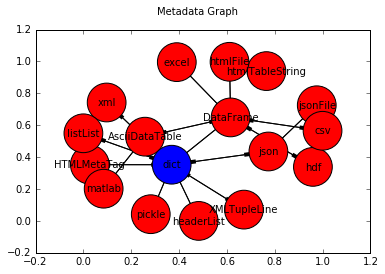

In [36]:
metadata_graph.show(node_size=1500)

In [11]:
metadata_graph.get_path("xml","htmlTableString")

['edge_xml_dict_000',
 'edge_dict_DataFrame_000',
 'edge_DataFrame_htmlFile_000',
 'edge_htmlFile_htmlTableString_000']

In [37]:
def move_and_print(end_node_number):
    node=metadata_graph.node_names[end_node_number]
    metadata_graph.move_to_node(node)
    print("*"*80)
    print("{0}".format(metadata_graph.node_descriptions[end_node_number])+" {0}".format(metadata_graph.state))
    print("*"*80)
    print metadata_graph.data
    
interact(move_and_print,end_node_number=(0,len(metadata_graph.node_names)-1,1))

['edge_matlab_AsciiDataTable_000', 'edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_excel_000']
moving matlab -> AsciiDataTable
moving AsciiDataTable -> DataFrame
moving DataFrame -> excel
********************************************************************************
excel [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
********************************************************************************
Test.xlsx


In [27]:
metadata_graph.get_path("dict","excel")

['edge_dict_DataFrame_000', 'edge_DataFrame_excel_000']

In [29]:
def dict_to_header_list(python_dictionary):
    "Converts a python dictionary to a list of strings in the form ['key1=value1',..'keyN=valueN']"
    out_string=""
    out_list=[]
    for key,value in python_dictionary.iteritems():
        out_string="{0}={1}".format(key,value)
        out_list.append(out_string)
    return out_list

def header_list_to_dict(header_list):
    out_dictionary={}
    for item in header_list:
        key_value_list=item.split("=")
        key=key_value_list[0]
        value=key_value_list[1]
        out_dictionary[key]=value
    return out_dictionary
    

['edge_matlab_AsciiDataTable_000', 'edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_excel_000']
moving matlab -> AsciiDataTable
moving AsciiDataTable -> DataFrame
moving DataFrame -> excel


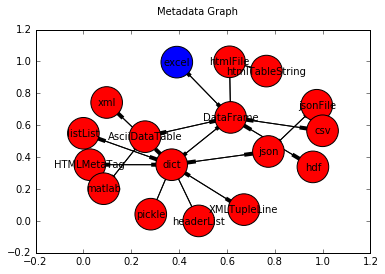

In [38]:
%matplotlib inline
def move_and_show(end_node_number):
    node=metadata_graph.node_names[end_node_number]
    metadata_graph.move_to_node(node)
    #print("*"*80)
    #print("{0}".format(metadata_graph.node_descriptions[end_node_number])+" {0}".format(metadata_graph.state))
    #print("*"*80)
    metadata_graph.show(descriptions=False)
    #print metadata_graph.data

    
interact(move_and_show,end_node_number=(0,len(metadata_graph.node_names)-1,1))

In [ ]:
metadata_graph.move_to_node("DataFrame")
df=metadata_graph.data
html_file=DataFrame_to_html_file(df)
df2=html_file_to_pandas(html_file)
print df2["Value"]

In [ ]:
len(df2["Value"].tolist()[11])

In [ ]:
raw=TwoPortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN208.L26_121399'))
metadata_graph.set_state("dict",raw.options)
interact(move_and_print,end_node_number=(0,len(metadata_graph.node_names)-1,1))

In [ ]:
test_dictionary={"New":"Value","old":"value"}

In [ ]:
dictionary_to_list_list(test_dictionary)

In [ ]:

def dictionary_to_HTML_meta(python_dictionary):
    """Converts a python dictionary to meta tags for html"""
    out_string=""
    for key,value in python_dictionary.iteritems():
        out_string=out_string+"<meta name="+'"{0}"'.format(key)+" content="+'"{0}"'.format(value)+" />\n"
    return out_string

def HTML_meta_to_dictionary(HTML_meta_tags_string):
    """Converts a python dictionary to meta tags for html"""
    pattern='<meta name="(?P<key>.+)" content="(?P<value>.+)" />'
    lines=HTML_meta_tags_string.splitlines()
    out_dictionary={}
    for line in lines:
        match=re.search(pattern,line)
        if match:
            key=match.groupdict()["key"]
            value=match.groupdict()["value"]
            out_dictionary[key]=value
    return out_dictionary

In [ ]:
html=dictionary_to_HTML_meta(test_dictionary)
print html

In [ ]:
dictionary=HTML_meta_to_dictionary(html)
print dictionary

In [ ]:
dictionary==test_dictionary

In [ ]:
def dictionary_to_tuple_line(python_dictionary):
    """transforms a python dictionary into a xml line in the form <Tuple key1=value1 key2=value2..keyN=valueN />"""
    prefix="<Tuple "
    postfix=" />"
    inner=""
    for key,value in python_dictionary.iteritems():
        inner=inner+'{0}="{1}" ' .format(key,value)
        xml_out=prefix+inner+postfix
    return xml_out

def tuple_line_to_dictionary(tuple_line):
    """Takes a line in the form of <Tuple key1=value1 key2=Value2 ...KeyN=ValueN /> and returns a dictionary"""
    stripped_string=tuple_line.replace("<Tuple","")
    stripped_string=stripped_string.replace("/>","")
    pattern="(?<=\")(?<!,|:)\s+(?!,+)"
    lines=re.split(pattern,stripped_string)
    out_dictionary={}
    for line in lines:
        split_line=line.split("=")
        print split_line
        if len(split_line)==2:
            key=split_line[0].rstrip().lstrip().replace("\"","")
            value=split_line[1].rstrip().lstrip().replace("\"","")
            out_dictionary[key]=value
    return out_dictionary

In [ ]:
test_dictionary={"column_types":['float','float','int','string'],"column_descriptions":{"a":"Column a",
                                                                                        "b":"Column b",
                                                                                        "c":"Column c",
                                                                                        "d":"Column d"}}

In [ ]:
tuple_line=dictionary_to_tuple_line(test_dictionary)

In [ ]:
print tuple_line

In [ ]:
dict_2=tuple_line_to_dictionary(tuple_line)

In [ ]:
dict_2

In [ ]:
raw=TwoPortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN208.L26_121399'))
metadata_graph.set_state("dict",raw.options)
metadata_graph.move_to_node("DataFrame")
df=metadata_graph.data
print df

In [ ]:
df.dtypes

In [ ]:
python_dictionary=raw.options
data_list=[[key,value] for key,value in python_dictionary.iteritems()]
df3=pandas.DataFrame(data_list,columns=["Property","Value"])

In [ ]:
html_file=DataFrame_to_html_file(df3)

In [ ]:
def html_file_to_pandas(html_file_name):
#     in_file=open(html_file_name,'r')
    pandas_data_frame=pandas.read_html(html_file_name,thousands=None)
    return pandas_data_frame[0]

In [ ]:
html=html_file_to_html_string(html_file)
#print html

In [ ]:
df4=html_file_to_pandas(html_file)

In [ ]:
df4

In [ ]:
table=DataFrame_to_AsciiDataTable(df)

In [ ]:
csv=DataFrame_to_csv(df)

In [ ]:
df4=csv_to_DataFrame("test.csv")

In [ ]:
df4["Value"][45]

In [ ]:
hdf=DataFrame_to_hdf(df4)

In [ ]:
df5=hdf_to_DataFrame(hdf)

In [ ]:
df4["Value"][12]

In [ ]:
def DataFrame_to_HTML_string(pandas_data_frame):
    old_width = pandas.get_option('display.max_colwidth')
    pandas.set_option('display.max_colwidth', -1)
    html=pandas_data_frame.to_html(index=False)
    pandas.set_option('display.max_colwidth', old_width)
    return html

In [ ]:
html=DataFrame_to_HTML_string(df5)

In [ ]:
print html

In [ ]:
df6=HTML_string_to_DataFrame(html)

In [ ]:
df6["Value"][12]

In [ ]:
print html

In [ ]:
df6.fillna("None")

In [ ]:
a="\n".rstrip()

In [ ]:
a